In [1]:
# At first all necessary Python packages are imported that are required for doing the job

import numpy as np# NumPy is the standard package for numerical calculations in Python. For less typing and better reading, numpy is renamed to a shorter abbreviation np
from matplotlib import pyplot as plt # PyPlot is the standard subpackage from MatPlotLib for data visualization in Python. For less typing and better reading, pyplot is renamed to a shorter abbreviation plt
import math # for mathematical standard functions
# This socalled "magical command" tells JupyterLab to create all plots and figures inside the below textflow with interactive zoom functionality for better data investigation
%matplotlib widget

In [2]:
# Specify filename with extension to be read in
fname='22050210.055'

# np.genfromtxt is a function that reads in data from a (text-)file.
# the function is documented in detail here: https://numpy.org/doc/2.1/reference/generated/numpy.genfromtxt.html
# here we read in the file with name "fname", specify the symbol that delimits the individual columns (tab symbol), skip the first 5 lines because they are just metainformation and column names
data=np.genfromtxt(fname,skip_header=19)

In [3]:
print(data.shape) # This prints the data array
print(data[0]) # Print the first data row and check whether it is really the first data row from the text file

(4515, 10)
[ 1.872e+03  2.000e+00  4.050e+02 -0.000e+00 -2.630e+02  1.000e+00
  1.000e+00 -2.630e+02  2.100e+02  1.950e+02]


Text(0.5, 1.0, 'Overview over all peaks')

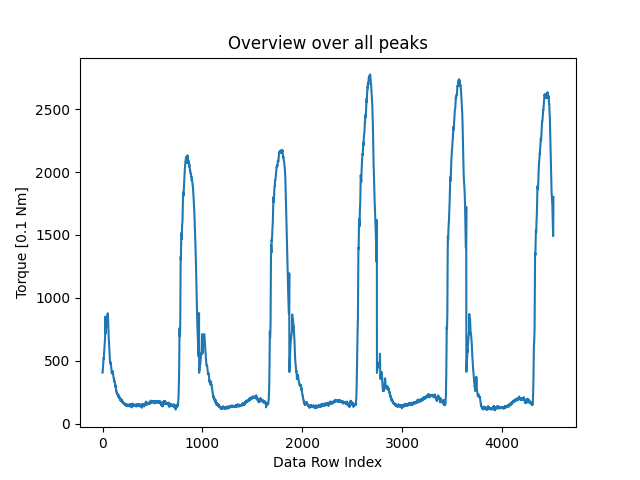

In [4]:
# Here we will first look at the torque data
fig=plt.figure() # creates a new figure
ax=fig.add_subplot(111) # adds one plot to the figure
ax.plot(np.arange(0,data.shape[0]),data[:,2]) # plot Row index (starting from 0) vs Torque (Column 3)
ax.set_xlabel('Data Row Index')
ax.set_ylabel('Torque [0.1 Nm]')
ax.set_title('Overview over all peaks')

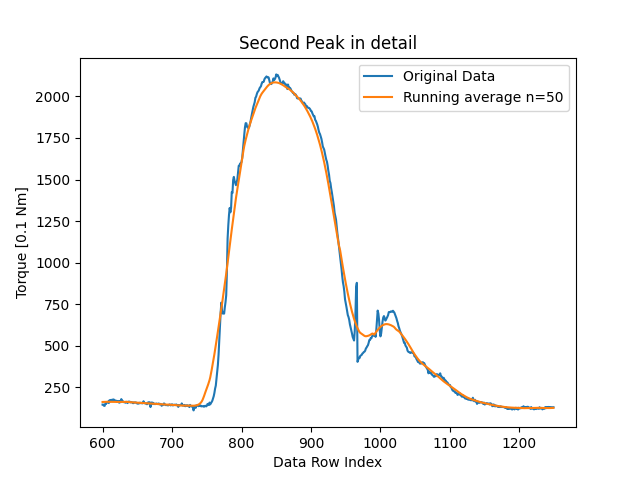

In [5]:
# In the next plot we choose only the second peak for a more detailed and isolated investigation
# The correct start and end indices of the second peak can easily be determined from the x axis of the plot above
# Hovering with the mouse over the plot above makes the current coordinates appear in real time below the plot
fig=plt.figure() # creates a new figure
ax=fig.add_subplot(111) # adds one plot to the figure
start_index,end_index=600,1250
line1=ax.plot(np.arange(start_index,end_index),data[start_index:end_index,2],label='Original Data') # plot Row index (starting from 0) vs Torque (Column 3)
ax.set_xlabel('Data Row Index')
ax.set_ylabel('Torque [0.1 Nm]')
ax.set_title('Second Peak in detail')

# calculate and plot the running average with specified window_length

# Numpy does have easy ways for calculating a running average (see https://stackoverflow.com/questions/13728392/moving-average-or-running-mean),
# but there is no ready-to-use function for calculating the running average that corrects for the shift effect and has an adaptive window_length for the first and last points,
# so let's make our own running anverage function that does the job
def running_average(array_1D,window_length=3):
    """
        array_1D: 1-dimensional array or list
        window_length: max number of points to be averaged per original data point. will be less for the first and last few data points. Default=3
    """
    # Initialize a new array of the same size as the original array filled with zeros
    new_array=np.zeros(array_1D.shape)
    for i in range(0,array_1D.size):
        window_startindex,window_endindex=i-math.ceil(window_length/2)+1,i+int(window_length/2) # calculate start and end indices of the symmetric window around data point i
        if window_startindex<0:
            window_startindex=0 # The window startindex can never be negative
        if window_endindex>=array_1D.size:
            window_endindex=array_1D.size # The window endindex can never be bigger than the index of the last data point
        new_array[i]=np.mean(array_1D[window_startindex:window_endindex]) # calculates the mean of the window
    return new_array # returns the running average of the original array without shift effect 
    
window_length=50 # specify the window_length, play around and see how it changes in the plot below
# The line below is short but messy, because it's nesting the running_average function into the plotting function
# Alternatively you could first define a new array for calculating and saving the running average and then put this into the plotting function
line2=ax.plot(np.arange(start_index,end_index),running_average(data[start_index:end_index,2],window_length=window_length),label='Running average n='+str(window_length))

legend=ax.legend() # generate an automativ plot legend based on the labels that were specified in the previous plot functions

(1000, 4515, 10)


Text(0.5, 1.0, 'Second Peak in detail')

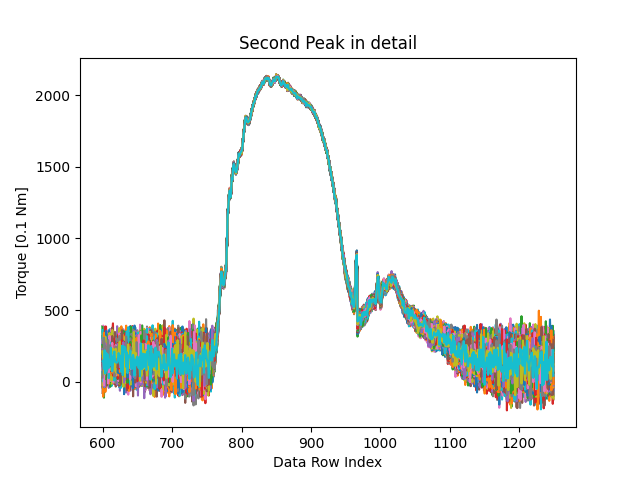

In [6]:
# Now let's generate 999 more data sets from the one we have, to simulate the case in which we have 1000 different files
repeats=1000
data_sets=np.repeat(data[np.newaxis,:,:], repeats, axis=0)
print(data_sets.shape) # print the shape of the complete data_sets array

# Let's add a random noise to the torque column to make the 1000 different data sets look different
# the additional noise data is generated from a normal distribution with specified standard deviation
std=1e4 # standard deviation of the added normal noise
data_sets[:,:,2]+=np.random.normal(scale=std,size=data_sets.shape[:2])/data_sets[:,:,2]

# Now let's plot all the 1000 data series in one new plot
# For better visability the individual plots are automatically colored differently
fig=plt.figure() # creates a new figure
ax=fig.add_subplot(111) # adds one plot to the figure
for i in range(0,data_sets.shape[0]):
    line1=ax.plot(np.arange(start_index,end_index),data_sets[i,start_index:end_index,2]) # plot Row index (starting from 0) vs Torque (Column 3)
ax.set_xlabel('Data Row Index')
ax.set_ylabel('Torque [0.1 Nm]')
ax.set_title('Second Peak in detail')

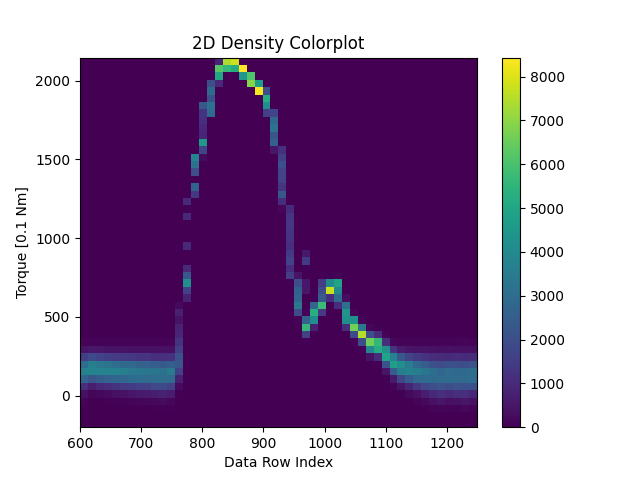

In [7]:
# This is a messy visualisation that does not allow to see what's happening very good
# Fortunately we can visualize this in the form of a 2D histogram that indicates the density of points as a color
# So areas in which points of all data series are more concentrated will be colored stronger
fig=plt.figure() # creates a new figure
ax=fig.add_subplot(111) # adds one plot to the figure
bins=50 # number of bins of the histogram
hist=ax.hist2d(np.array([np.arange(start_index,end_index) for i in data_sets]).flatten(),data_sets[:,start_index:end_index,2].flatten(),bins=bins)
ax.set_xlabel('Data Row Index')
ax.set_ylabel('Torque [0.1 Nm]')
ax.set_title('2D Density Colorplot')
fig.colorbar(hist[3])